# QSTK

This is my notebook to learn about QSTK or how to do quantitative financial modelling. 

The wiki can be found here. http://wiki.quantsoftware.org/index.php?title=QuantSoftware_ToolKit

## Reading historical data

In [22]:
import QSTK.qstkutil.qsdateutil as du
import QSTK.qstkutil.tsutil as tsu
import QSTK.qstkutil.DataAccess as da

import datetime as dt
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [23]:
ls_symbols = ["AAPL", "GLD", "GOOG", "$SPX", "XOM"]
dt_start = dt.datetime(2006,1,1)
dt_end = dt.datetime(2010, 12, 31)
dt_timeofday = dt.timedelta(hours=16)
ldt_timestamps = du.getNYSEdays(dt_start, dt_end, dt_timeofday)

In [24]:
c_dataobj = da.DataAccess('Yahoo')
ls_keys = ['open', 'high', 'low', 'close', 'volume', 'actual_close']
ldf_data = c_dataobj.get_data(ldt_timestamps, ls_symbols, ls_keys)
d_data = dict(zip(ls_keys, ldf_data))

Show me the open prices of AAPL

In [53]:
d_data['open']['AAPL'].head()

2006-01-03 16:00:00    72.38
2006-01-04 16:00:00    75.13
2006-01-05 16:00:00    74.83
2006-01-06 16:00:00    75.25
2006-01-09 16:00:00    76.73
Name: AAPL, dtype: float64

In [25]:
d_data['actual_close'].head()

,AAPL,GLD,GOOG,$SPX,XOM
2006-01-03 16:00:00,74.75,53.12,435.23,1268.80,58.47
2006-01-04 16:00:00,74.97,53.30,445.24,1273.46,58.57
2006-01-05 16:00:00,74.38,52.34,451.24,1273.48,58.28
2006-01-06 16:00:00,76.30,53.72,465.66,1285.45,59.43
2006-01-09 16:00:00,76.05,54.60,466.90,1290.15,59.40


In [65]:
d_data['close'].head()

,AAPL,GLD,GOOG,$SPX,XOM
2006-01-03 16:00:00,74.43,53.12,435.23,1268.80,50.47
2006-01-04 16:00:00,74.65,53.30,445.24,1273.46,50.56
2006-01-05 16:00:00,74.06,52.34,451.24,1273.48,50.31
2006-01-06 16:00:00,75.97,53.72,465.66,1285.45,51.30
2006-01-09 16:00:00,75.72,54.60,466.90,1290.15,51.28


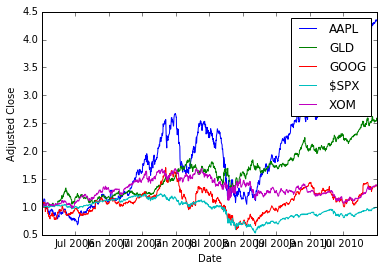

In [27]:
na_price = d_data['close'].values
na_normalized_price = na_price / na_price[0, :]
plt.clf()
plt.plot(ldt_timestamps, na_normalized_price)
plt.legend(ls_symbols)
plt.ylabel('Adjusted Close')
plt.xlabel('Date')

## Daily Returns

It can be calculated using this formula

ret(t) = (price(t) / price(t-1)) - 1

In [74]:
na_normalized_price

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [ 1.0029558 ,  1.00338855,  1.02299933,  1.00367276,  1.00178324],
       [ 0.99502889,  0.98531627,  1.03678515,  1.00368852,  0.9968298 ],
       ..., 
       [ 4.35415827,  2.58320783,  1.37609999,  0.99188997,  1.39449178],
       [ 4.35173989,  2.59243223,  1.38087908,  0.99289092,  1.39369923],
       [ 4.32997447,  2.57963102,  1.37596213,  0.99139344,  1.39350109]])

In [73]:
na_rets = na_normalized_price.copy()
tsu.returnize0(na_rets)

array([[  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00],
       [  2.95579739e-03,   3.38855422e-03,   2.29993337e-02,
          3.67276166e-03,   1.78323757e-03],
       [ -7.90354990e-03,  -1.80112570e-02,   1.34758782e-02,
          1.57052440e-05,  -4.94462025e-03],
       ..., 
       [  2.44362647e-03,   1.62938824e-02,  -5.74388260e-03,
          7.71347233e-04,   5.57222460e-03],
       [ -5.55418415e-04,   3.57090803e-03,   3.47291792e-03,
          1.00912984e-03,  -5.68343279e-04],
       [ -5.00154369e-03,  -4.93791301e-03,  -3.56073211e-03,
         -1.50819984e-03,  -1.42166619e-04]])

Using pure pandas

In [99]:
pct_change = pd.DataFrame(na_normalized_price).pct_change(1)
pct_change.head()

,0,1,2,3,4
0,NaN,NaN,NaN,NaN,NaN
1,0.002956,0.003389,0.022999,0.003673,0.001783
2,-0.007904,-0.018011,0.013476,0.000016,-0.004945
3,0.025790,0.026366,0.031956,0.009399,0.019678
4,-0.003291,0.016381,0.002663,0.003656,-0.000390


In [128]:
daily_change_of_AAPL = pct_change.ix[:50, 0]

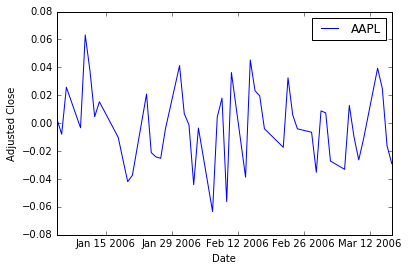

In [129]:
plt.clf()
plt.plot(ldt_timestamps[0:51][:], daily_change_of_AAPL)
plt.legend(ls_symbols)
plt.ylabel('Adjusted Close')
plt.xlabel('Date')

The scatter plot of $SPX versus GLD

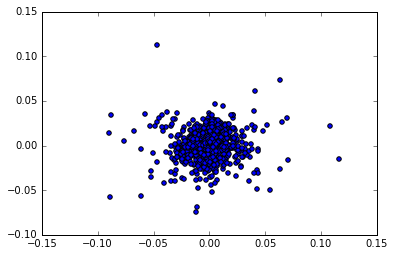

In [39]:
plt.scatter(na_rets[:, 3], na_rets[:, 1], c='blue')

## Cumulative Daily Returns

daily_cum_ret(t) = daily_cum_ret(t-1) * (1 + daily_ret(t))

In [138]:
cumulative_daily_returns = pct_change.cumsum()

In [139]:
cumulative_daily_returns.head()

,0,1,2,3,4
0,NaN,NaN,NaN,NaN,NaN
1,0.002956,0.003389,0.022999,0.003673,0.001783
2,-0.004948,-0.014623,0.036475,0.003688,-0.003161
3,0.020842,0.011743,0.068432,0.013088,0.016517
4,0.017551,0.028125,0.071094,0.016744,0.016127


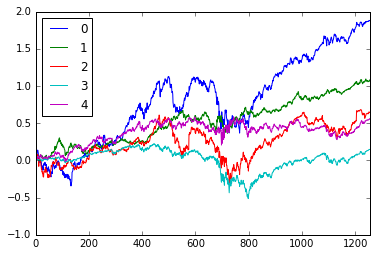

In [140]:
cumulative_daily_returns.plot()

## Simulation

Going to write a function than returns, SD, avg_daily_returns, sharpe and cumulative return of portfolio

vol, daily_ret, sharpe, cum_ret = simulate(startdate, enddate, ['GOOG', 'AAPL', 'GLD', 'XOM'], [0.2, 0.3, 0.4, 0.1]

### Example

**Start Date**: January 1, 2011 <br>
**End Date**: December 31, 2011 <br>
**Symbols**: ['AAPL', 'GOOG', 'XOM', 'GLD'] <br>
**Optimal Allocations**: [0.4, 0.0, 0.2, 0.4] <br>
**Sharpe Ratio**: 1.02828403099 <br>
**Volatility (stdev of daily returns)**: 0.0101467067654 <br>
**Average Daily Return**: 0.000657261102001 <br>
**Cumulative Return**: 1.16487261965 <br>

In [144]:
def simulate(dt_start, dt_end, symbols, allocs):
    dt_timeofday = dt.timedelta(hours=16)
    ldt_timestamps = du.getNYSEdays(dt_start, dt_end, dt_timeofday)
    
    vol = 0
    daily_ret = 0
    sharpe = 0
    cum_ret = 0
    return vol, daily_ret, sharpe, cum_ret

In [145]:
symbols = ['AAPL', 'GOOG', 'XOM', 'GLD']
dt_start = dt.datetime(2006, 1, 1)
dt_end = dt.datetime(2010, 12, 31)
allocs = [0.2, 0.3, 0.4, 0.1]

In [146]:
simulate(dt_start, dt_end, symbols, allocs)

(0, 0, 0, 0)